
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E04_logistic_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Logistic regression exercises 

---
These are introductory exercises in Machine learning with focus in **logistic regression**

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Iris flower dataset (*)

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.

In [2]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()
iris.values()
iris.feature_names
iris.target_names
iris.target
iris.data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

&nbsp; b) Now insert the data into a DataFrame. 

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add the species to the DataFrame
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

&nbsp; c) Do some EDA to get an understanding of the dataset.

In [4]:
iris_df.info(),iris_df.describe(),iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


(None,
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
 count         150.000000        150.000000         150.000000   
 mean            5.843333          3.057333           3.758000   
 std             0.828066          0.435866           1.765298   
 min             4.300000          2.000000           1.000000   
 25%             5.100000          2.800000           1.600000   
 50%             5.800000          3.000000           4.350000   
 75%             6.400000          3.300000           5.100000   
 max             7.900000          4.400000           6.900000   
 
        petal width (cm)  
 count        150.000000  
 mean           1.199333  
 std            0.762238  
 min            0.100000  
 25%            0.300000  
 50%            1.300000  
 75%            1.800000  
 max            2.500000  ,
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               

#### Chattus GPTus explananda
"Sepal" och "petal" är termer som används för att beskriva delar av en blomma. 

- En **sepal** är en del av blomman som typiskt tjänar som skydd för blomknoppen innan den öppnas. Sepaler är ofta grönare och tjockare än kronbladen och ligger under dessa när blomman är öppen. I en irisblomma är sepalerna de yttre bladdelarna som kan vara färgade och utgör blommans bas.

- En **petal** är en individuell kronblad i blomman. Kronbladen är oftast de färgstarka delarna av blomman som attraherar pollinerare som insekter och fåglar. I irisblomman är de vanligtvis de mer färgglada och ögonfallande delarna som bildar blommans "ansikte".

Irisblommor är kända för sina distinkta sepaler och kronblad, där sepaler ofta hänger neråt eller står utåt och kronbladen står uppåt och kan ha olika färger och mönster.

c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


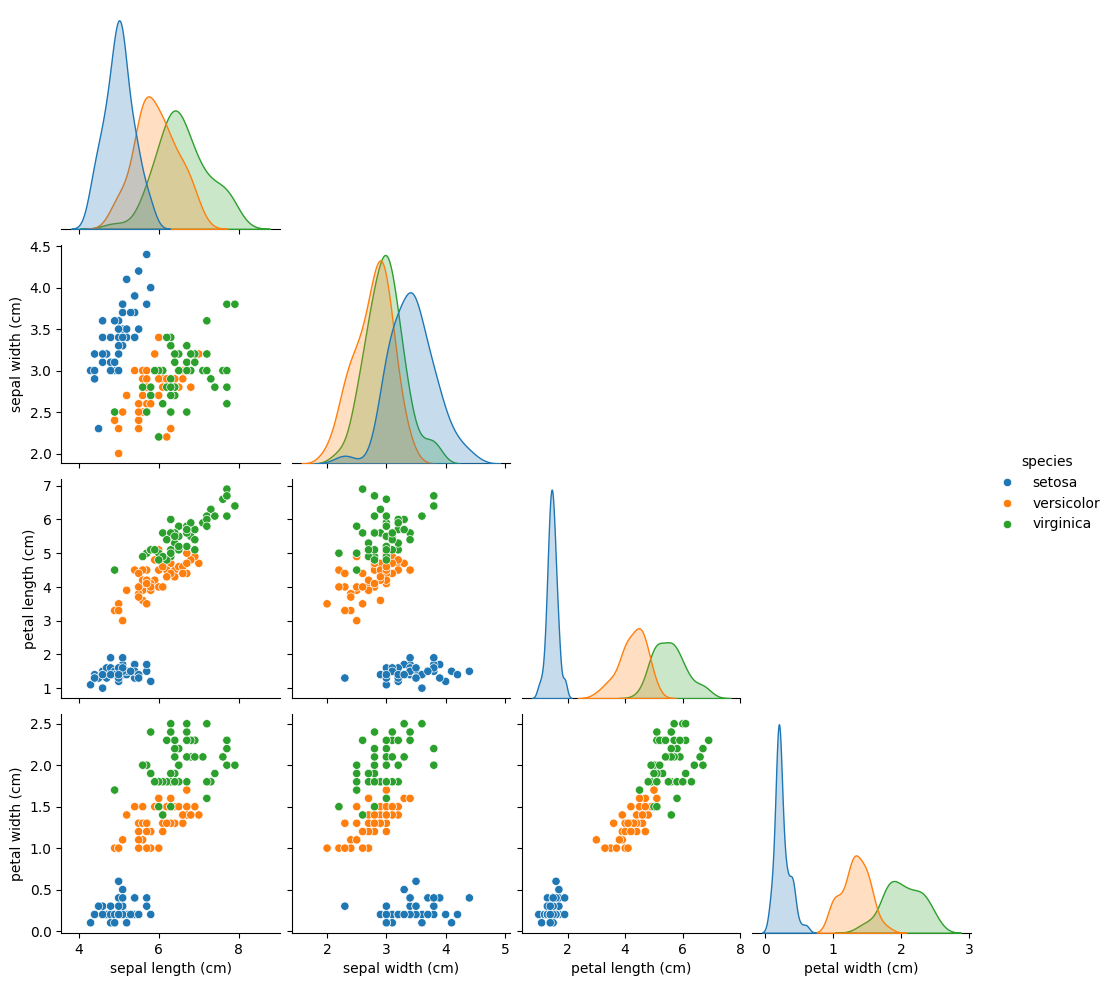

In [5]:
# Now, create a pairplot with the hue set to the species column
sns.pairplot(iris_df, hue='species', corner=True)

&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

<Axes: >

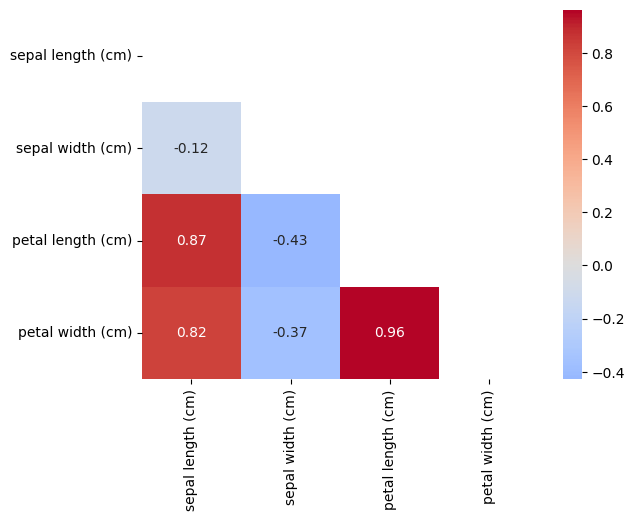

In [6]:
iris_df_no_species = iris_df.drop(columns='species')
sns.heatmap(iris_df_no_species.corr(), annot=True, cmap='coolwarm', center=0, mask=np.triu(np.ones_like(iris_df_no_species.corr(), dtype=bool)))

The numbers mean that petal width and petal length are higly correlated. Also that sepal length are higly correlated to petal size, but the width has a relatively weak negative correlation. Oddly, sepal length has the weakest correlation to sepal width, which is slightly negative.

&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

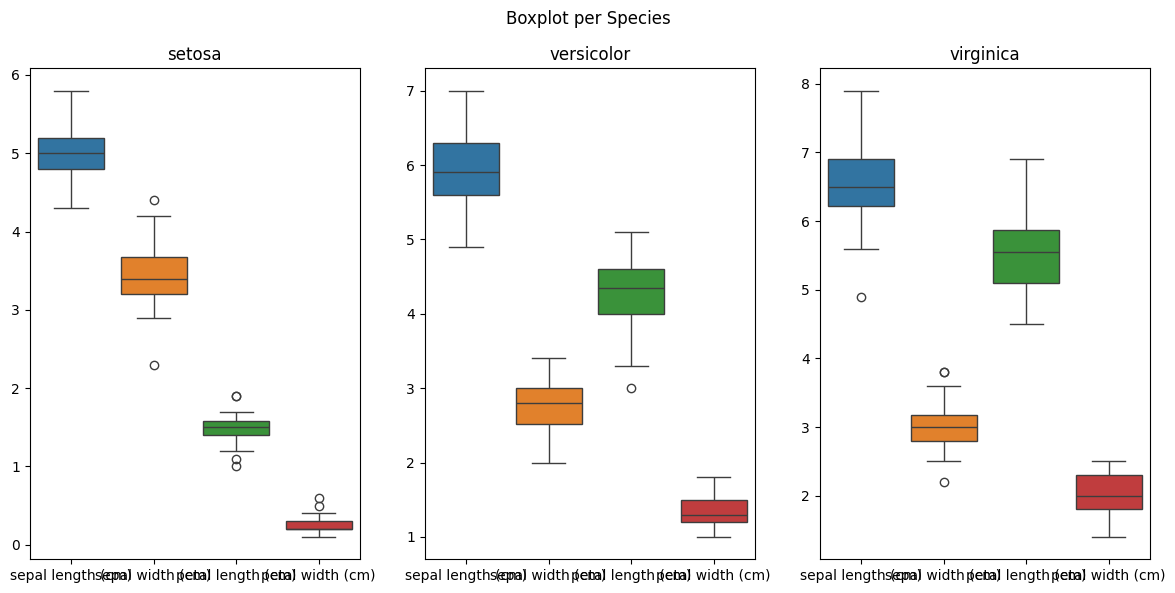

In [7]:
# Get unique species names
species_names = iris_df['species'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(species_names), figsize=(12, 6))

# Iterate over species names and create boxplot for each species
for i, species in enumerate(species_names):
    sns.boxplot(data=iris_df[iris_df['species'] == species], orient='v', ax=axes[i])
    axes[i].set_title(species)

# Set the overall title for the subplots
fig.suptitle('Boxplot per Species')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# sns.boxplot(data=iris_df, orient='h')

&nbsp; f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 


In [14]:
for column in iris_df.columns:
    if column == "species":
        continue
    Q1 = iris_df[column].quantile(0.25)
    Q3 = iris_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame based on the calculated bounds
    iris_df = iris_df[(iris_df[column] >= lower_bound) & (iris_df[column] <= upper_bound)]

# Display the results
print(iris_df.describe(),"\n")
print(iris_df["species"].value_counts())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         146.000000        146.000000         146.000000   
mean            5.856849          3.040411           3.806849   
std             0.834093          0.397853           1.758042   
min             4.300000          2.200000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.400000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.000000           6.900000   

       petal width (cm)  
count        146.000000  
mean           1.220548  
std            0.759393  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000   

species
virginica     50
versicolor    49
setosa        47
Name: count, dtype: int64


This filtering is not giving the same results as for Kokchun. Maybe the dataset has been altered? Or ...
Kokchun made a mistake? Because it's impossible that I made one (notice the lack of irony).


<details>

<summary>Hint</summary>

a) For DESCR key you need to print it.

f) Dataframes has a quantile method.  

</details>

<details>

<summary>Answer</summary>

b) 

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   species | specie_name   |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|----------:|:--------------|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |         0 | setosa        |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |         0 | setosa        |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |         0 | setosa        |
|  3 |                 4.6 |                3.1 |                 1.5 |                0.2 |         0 | setosa        |
|  4 |                 5   |                3.6 |                 1.4 |                0.2 |         0 | setosa        |

c) When you do describe, remove species as its statistical values are meaningless. 

|                   |    mean |      std |   min |   25% |   50% |   75% |   max |
|:------------------|--------:|---------:|------:|------:|------:|------:|------:|
| sepal length (cm) | 5.84333 | 0.828066 |   4.3 |   5.1 |  5.8  |   6.4 |   7.9 |
| sepal width (cm)  | 3.05733 | 0.435866 |   2   |   2.8 |  3    |   3.3 |   4.4 |
| petal length (cm) | 3.758   | 1.7653   |   1   |   1.6 |  4.35 |   5.1 |   6.9 |
| petal width (cm)  | 1.19933 | 0.762238 |   0.1 |   0.3 |  1.3  |   1.8 |   2.5 |


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

## 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the DataFrame into X and y
X = iris_df.drop(columns='species')
y = iris_df['species']

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train μ: {X_train_scaled.mean()}\nX_test μ: {X_test_scaled.mean()}")
print(f"\nX_train σ: {X_train_scaled.std()}\nX_test σ: {X_test_scaled.std()}")

X_train μ: 2.998746726307124e-16
X_test μ: -0.026200181679167715

X_train σ: 0.9999999999999998
X_test σ: 0.9999349444958894



---

## 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# Define the model
logistic_regression = LogisticRegression(max_iter=1000)

# Define the parameter grid to search over
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Values for the inverse of regularization strength
    'penalty': ['l1', 'l2'],      # Types of regularization
    'solver': ['liblinear']       # Algorithm to use in the optimization problem (good for small datasets and l1 penalty)
}

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=10)

# Set up GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=cv_strategy, verbose=1, scoring='accuracy')

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test data (optional, as GridSearchCV already evaluates using cross-validation)
best_model = grid_search.best_estimator_


Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best parameters found:  {'C': 4.281332398719396, 'penalty': 'l1', 'solver': 'liblinear'}



<details>

<summary>Answer</summary>

weights: 

```py
array([[-1.33033256,  1.35076961, -2.26169407, -2.07715072],
       [ 0.40073538, -0.28598722, -0.58388865, -0.7782766 ],
       [ 0.67977172, -0.81485664,  3.09503329,  3.10542664]])
```

$\ell_1$-ratio:

```py
array([0.2, 0.2, 0.2])
```


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

## 3. Evaluate model (*)

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction.

In [42]:
# Make predictions on the scaled test data
y_pred = best_model.predict(X_test_scaled)

# Extract the first 10 actual and predicted labels
y_test_first_10 = y_test.iloc[:10].to_numpy()  # Convert to numpy array for easier comparison if y_test is a pandas Series
y_pred_first_10 = y_pred[:10]

# Print the comparison
print("First 10 actual labels:    ", y_test_first_10)
print("First 10 predicted labels: ", y_pred_first_10)

mask = y_test_first_10 == y_pred_first_10

# Print only the index of the incorrect predictions
print("\nIndexes of incorrect predictions: ", np.where(~mask))
print(f"True label of the incorrect prediction(s): {''.join(y_test_first_10[np.where(~mask)])}")
print(f"Predicted label of the incorrect prediction(s): {''.join(y_pred_first_10[np.where(~mask)])}")

First 10 actual labels:     ['setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'setosa']
First 10 predicted labels:  ['setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa'
 'versicolor' 'virginica' 'setosa']

Indexes of incorrect predictions:  (array([8], dtype=int64),)
True label of the incorrect prediction(s): versicolor
Predicted label of the incorrect prediction(s): virginica



&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

Text(0.5, 1.0, 'Confusion Matrix')

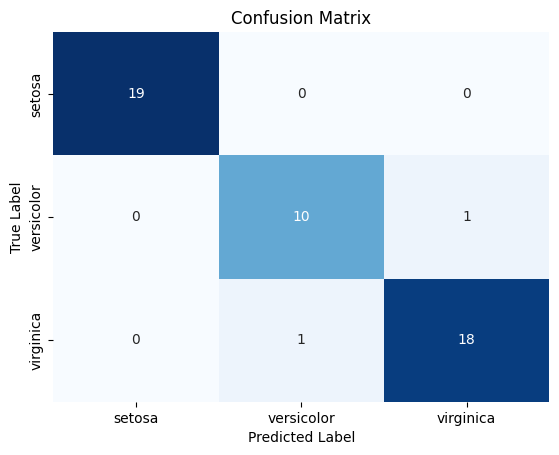

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names, cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')


&nbsp; c) Print a classification report 

In [32]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.91      0.91      0.91        11
   virginica       0.95      0.95      0.95        19

    accuracy                           0.96        49
   macro avg       0.95      0.95      0.95        49
weighted avg       0.96      0.96      0.96        49



In [33]:
accuracy_score(y_test, y_pred)

0.9591836734693877


<details>

<summary>Answer</summary>


b) 

<img src = "../assets/confusion_matrix_iris.png" height=300>



c) 

Classification report 

```py
          precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46
```






</details>

---

## 4. $k$-folded cross-validation for evaluation (**)

To be more robust in reporting the results, you should report the results as $\mu_{score}$, i.e. average score through a k-folded cross-validation. Report the score for precision, recall, f1-score for each label and overall accuracy. Do the cross-validation manually using for statement.

In [45]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define your model pipeline, including preprocessing steps
model = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))

# Define scorers
scoring = {
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'accuracy': 'accuracy'
}

# Perform cross-validation
cv_results = cross_validate(model, X, y, cv=4, scoring=scoring)

# Calculate and print the average scores
print(f"Average Precision (Weighted): {np.mean(cv_results['test_precision_weighted'])}")
print(f"Average Recall (Weighted): {np.mean(cv_results['test_recall_weighted'])}")
print(f"Average F1-Score (Weighted): {np.mean(cv_results['test_f1_weighted'])}")
print(f"Average Accuracy: {np.mean(cv_results['test_accuracy'])}")


Average Precision (Weighted): 0.0011261261261261261
Average Recall (Weighted): 0.006756756756756757
Average F1-Score (Weighted): 0.0019305019305019303
Average Accuracy: 0.006756756756756757


c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: Undefi

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated estimates for each input data point
predictions = cross_val_predict(model, X, y, cv=4)

# Detailed classification report, including per-label metrics
print(classification_report(y, predictions))


              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         2
        48.0       0.00      0.00      0.00         2
        49.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         1
        52.0       0.00      0.00      0.00         3
        53.0       0.00      0.00      0.00         2
        55.0       0.00      0.00      0.00         2
        59.0       0.00      0.00      0.00         3
        60.0       0.00      0.00      0.00         1
        61.0       0.00      0.00      0.00         2
        63.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         2
        68.0       0.00      0.00      0.00         2
        69.0       0.00      0.00      0.00         1
        71.0       0.00      0.00      0.00         1
        75.0       0.00      0.00      0.00         2
        81.0       0.00    

c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metri

## Extremt dålig score för den här sista. Så fortsätt här!
Det gäller alltså de två sista cellerna.

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---